<a href="https://colab.research.google.com/github/Ananya-AJ/CMPE255-Data-Mining/blob/main/Clustering/DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip install pycaret[full]==2.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 266 kB 19.6 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 141 kB 78.7 MB/s 
     |████████████████████████████████| 14.9 MB 59.8 MB/s 
     |████████████████████████████████| 325 kB 78.8 MB/s 
     |████████████████████████████████| 5.0 MB 61.3 MB/s 
     |████████████████████████████████| 25.8 MB 1.2 MB/s 
     |████████████████████████████████| 1.7 MB 57.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 65.2 MB/s 
     |████████████████████████████████| 6.8 MB 58.6 MB/s 
     |████████████████████████████████| 1.3 MB 73.3 MB/s 
     |████████████████████████████████| 167 kB 58.8 MB/s 
     |███████████████████████████████

##Generating synthetic data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 300

In [3]:
cols = ['column1', 'column2', 'column3',
        'column4', 'column5']
arr = make_blobs(n_samples = 1000, n_features = 5, random_state =20,
                 centers = 3, cluster_std = 1)
data = pd.DataFrame(data = arr[0], columns = cols)
data.head()

,column1,column2,column3,column4,column5
0,2.916076,6.504857,8.246937,6.185952,-9.776481
1,-2.044462,5.282757,5.265467,7.487941,6.347177
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881
3,2.155568,8.776136,5.788650,5.751763,-7.609132
4,-6.650020,5.458227,5.848407,7.150584,5.992247


##EDA

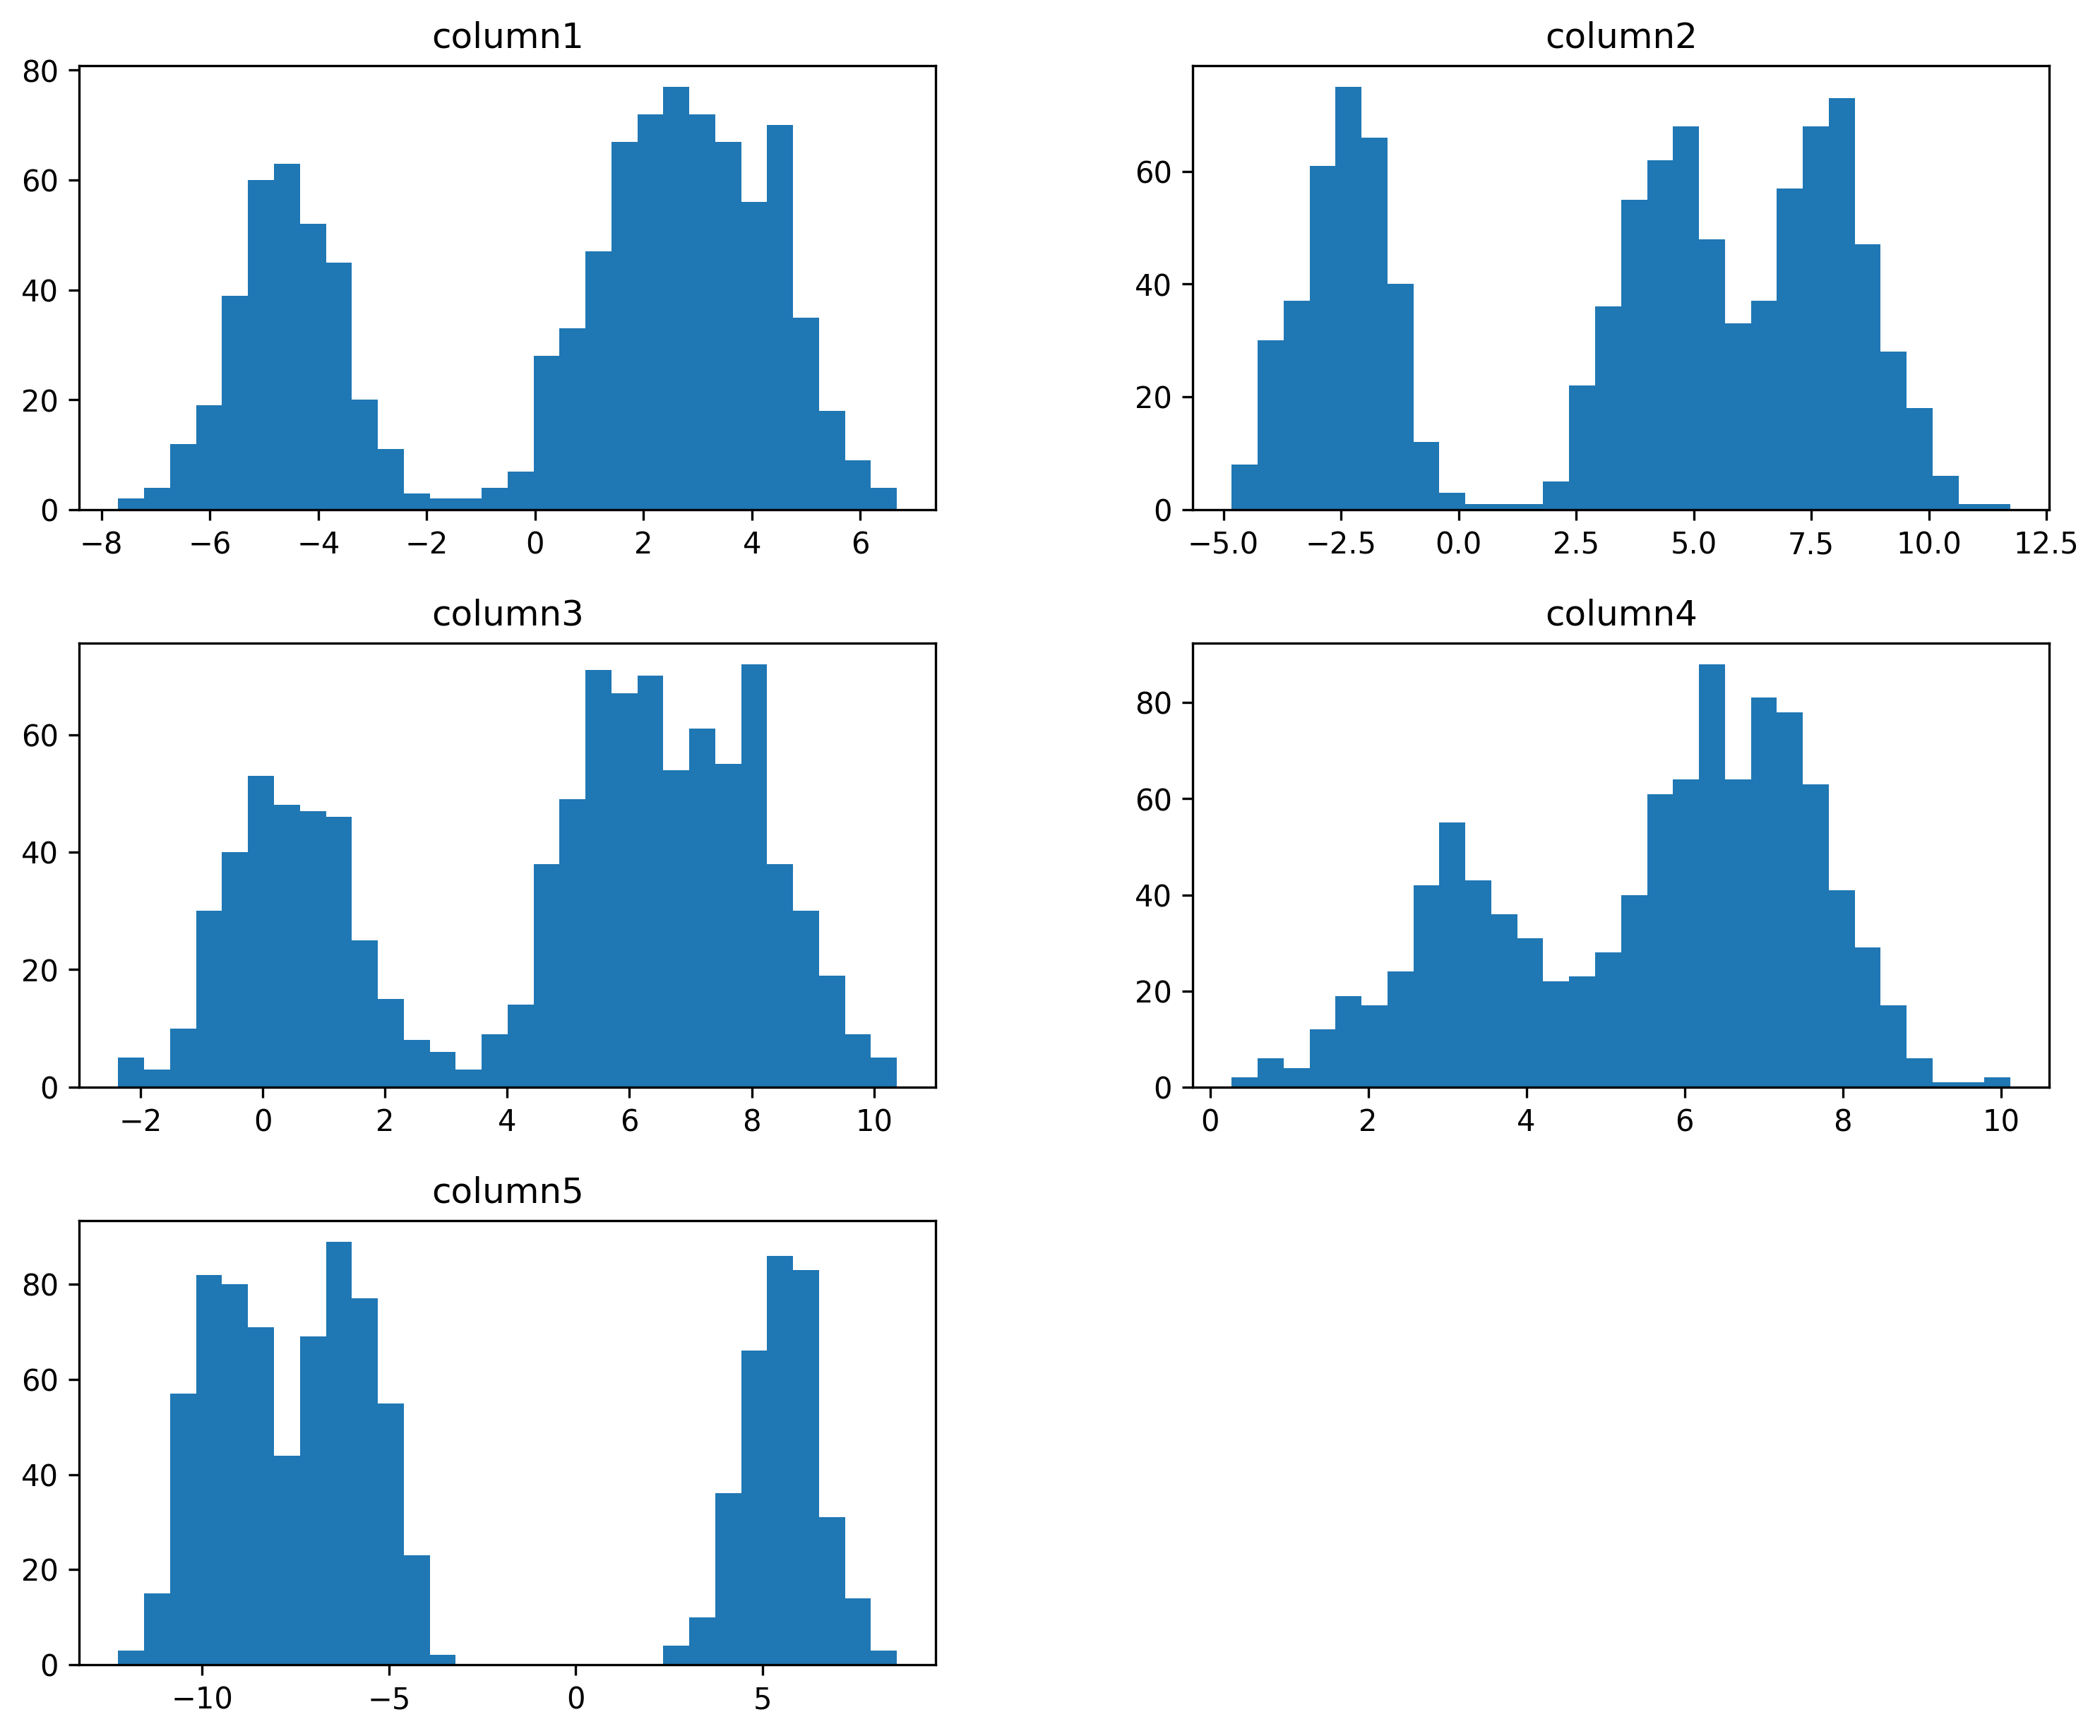

In [4]:
data.hist(bins = 30, figsize = (12,10), grid = False)
plt.show()

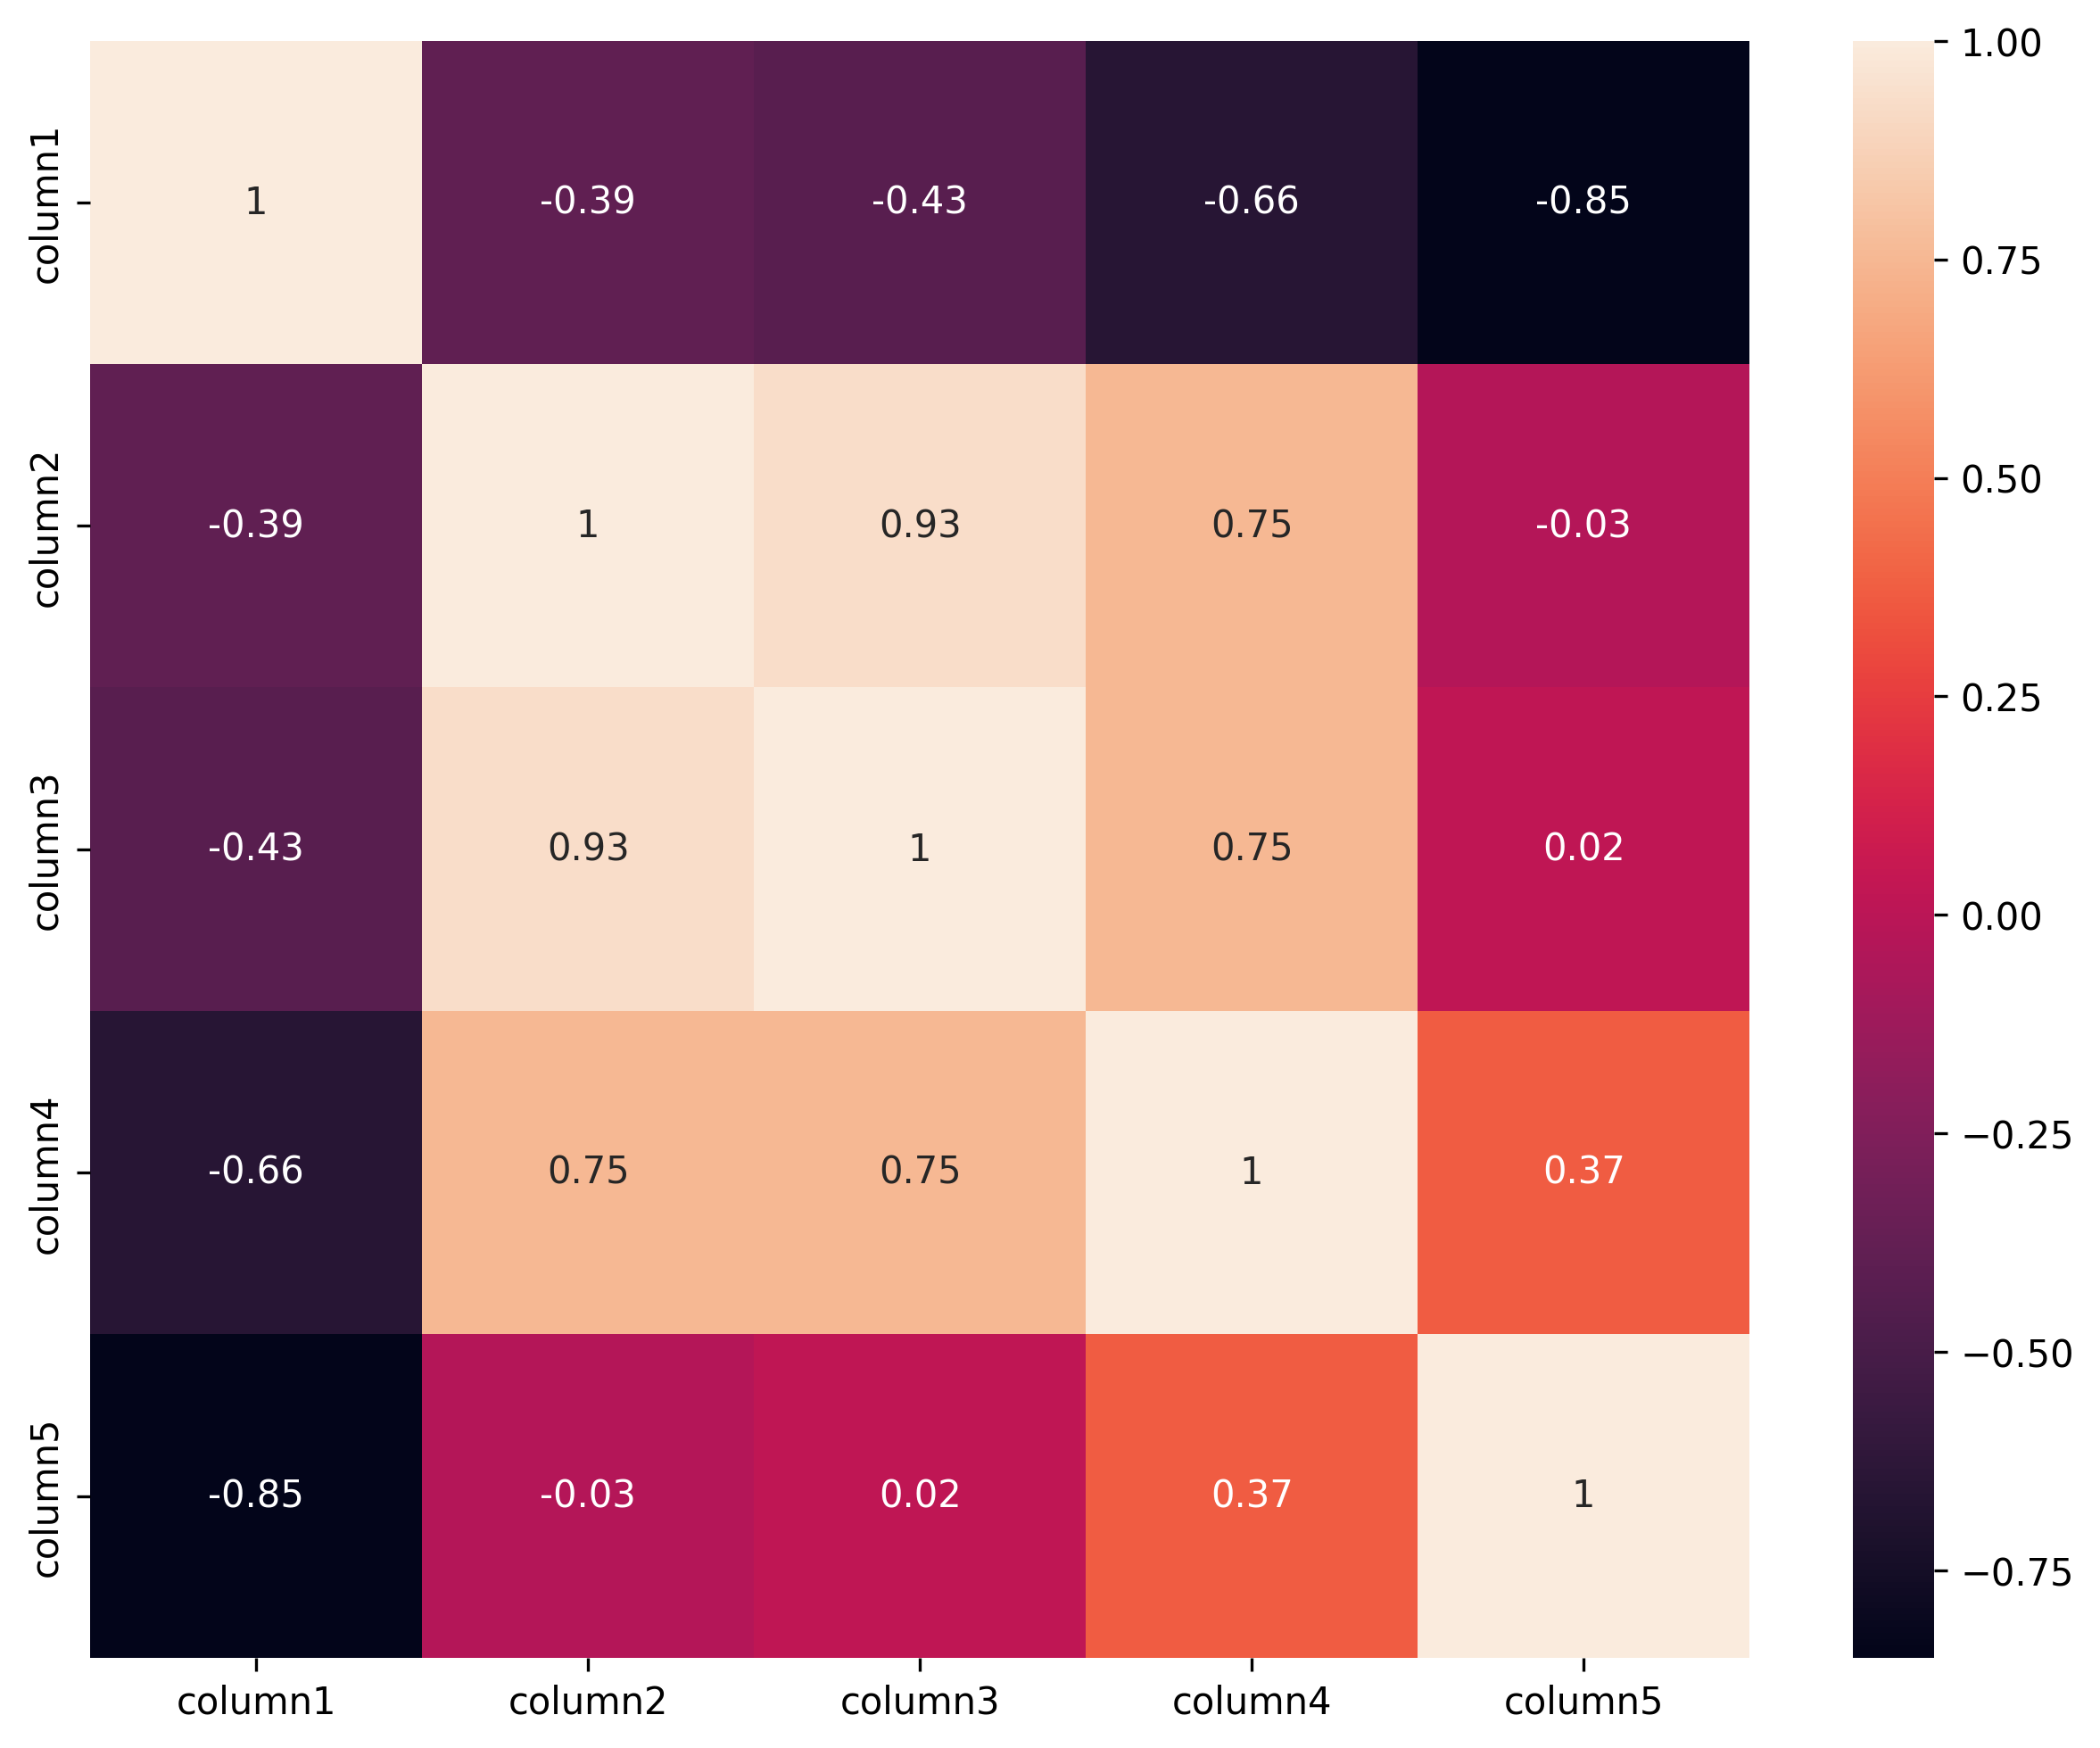

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

##initializaing pycaret

In [6]:
cluster = setup(data, session_id = 7652)

,Description,Value
0,session_id,7652
1,Original Data,"(1000, 5)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1000, 5)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [7]:
model = create_model('dbscan',num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)
INFO:logs:create_model() succesfully completed......................................


In [8]:
plot_model(model, 'cluster')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
